In [10]:
import os
import numpy as np

from ztlearn.utils import *
from ztlearn.dl.models import Sequential
from ztlearn.optimizers import register_opt
from ztlearn.datasets.digits import fetch_digits
from ztlearn.dl.layers import BatchNormalization, Conv2D
from ztlearn.dl.layers import Dropout, Dense, Flatten, MaxPooling2D

In [11]:
# optimizer definition
opt = register_opt(optimizer_name = 'adam', momentum = 0.01, learning_rate = 0.001)

In [12]:
data = fetch_digits(custom_path = os.getcwd() + '/..')
train_data, test_data, train_label, test_label = train_test_split(data.data,
                                                                  data.target,
                                                                  test_size   = 0.33,
                                                                  random_seed = 5)

# plot samples of training data
plot_img_samples(train_data, train_label)

TypeError: fetch_digits() got an unexpected keyword argument 'custom_path'

In [4]:
# optimizer definition
opt = register_opt(optimizer_name = 'adam', momentum = 0.01, learning_rate = 0.001)

# model definition
model = Sequential(init_method = 'he_uniform')
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (1, 8, 8), padding = 'same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(10, activation = 'softmax')) # 10 digits classes
model.compile(loss = 'categorical_crossentropy', optimizer = opt)

model.summary('digits cnn')

model_epochs = 12
fit_stats = model.fit(train_data.reshape(-1, 1, 8, 8),
                      one_hot(train_label),
                      batch_size      = 128,
                      epochs          = model_epochs,
                      validation_data = (test_data.reshape(-1, 1, 8, 8), one_hot(test_label)),
                      shuffle_data    = True)


 DIGITS CNN

 Input Shape: (1, 8, 8)
+---------------------+---------+--------------+
¦ LAYER TYPE          ¦  PARAMS ¦ OUTPUT SHAPE ¦ 
+---------------------+---------+--------------+
¦ Conv2D              ¦     320 ¦   (32, 8, 8) ¦ 
¦ Activation: RELU    ¦       0 ¦   (32, 8, 8) ¦ 
¦ Dropout             ¦       0 ¦   (32, 8, 8) ¦ 
¦ BatchNormalization  ¦   4,096 ¦   (32, 8, 8) ¦ 
¦ Conv2D              ¦  18,496 ¦   (64, 8, 8) ¦ 
¦ Activation: RELU    ¦       0 ¦   (64, 8, 8) ¦ 
¦ MaxPooling2D        ¦       0 ¦   (64, 7, 7) ¦ 
¦ Dropout             ¦       0 ¦   (64, 7, 7) ¦ 
¦ BatchNormalization  ¦   6,272 ¦   (64, 7, 7) ¦ 
¦ Flatten             ¦       0 ¦     (3,136,) ¦ 
¦ Dense               ¦ 803,072 ¦       (256,) ¦ 
¦ Activation: RELU    ¦       0 ¦       (256,) ¦ 
¦ Dropout             ¦       0 ¦       (256,) ¦ 
¦ BatchNormalization  ¦     512 ¦       (256,) ¦ 
¦ Dense               ¦   2,570 ¦        (10,) ¦ 
+---------------------+---------+--------------+

 TOTAL PARAMET

Targeted  : [7 7 8 2 3 4 9 2 6 7 7 8 0 4 4 2 1 0 5 8]
Predicted : [7 7 8 2 3 4 9 2 6 7 7 8 0 4 4 2 1 0 5 8]

Model Accuracy : 98.82% 



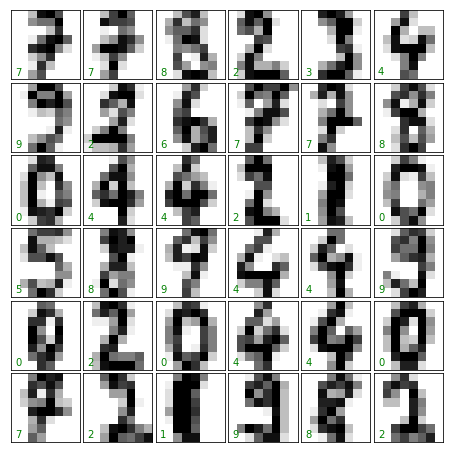

In [5]:
predictions = unhot(model.predict(test_data.reshape(-1, 1, 8, 8), True))
print_results(predictions, test_label)
plot_img_results(test_data, test_label, predictions)


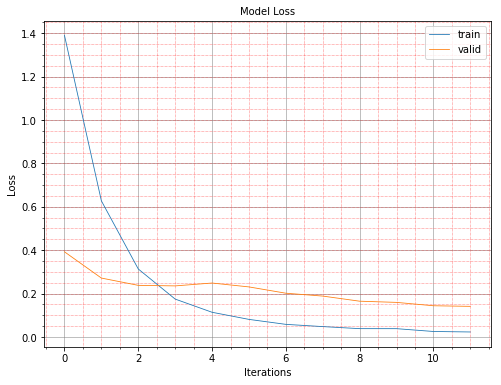

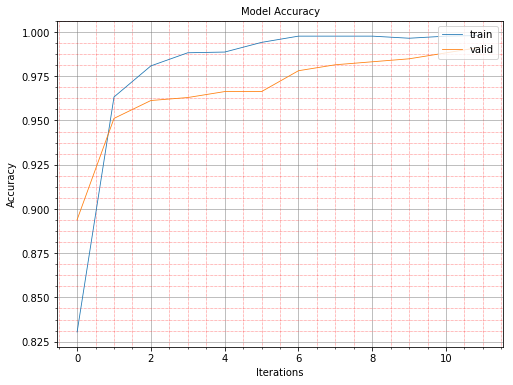

In [6]:
model_name = model.model_name
plot_metric('loss', model_epochs, fit_stats['train_loss'], fit_stats['valid_loss'], model_name = model_name)
plot_metric('accuracy', model_epochs, fit_stats['train_acc'], fit_stats['valid_acc'], model_name = model_name)